**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

**IMPORTING THE TESLA CSV FILE**

In [2]:
data= pd.read_csv('/content/TSLA.csv')
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-08,856.000000,884.489990,838.390015,880.020020,880.020020,75055500
1,2021-01-11,849.400024,854.429993,803.619995,811.190002,811.190002,59301600
2,2021-01-12,831.000000,868.000000,827.340027,849.440002,849.440002,46270700
3,2021-01-13,852.760010,860.469971,832.000000,854.409973,854.409973,33312500
4,2021-01-14,843.390015,863.000000,838.750000,845.000000,845.000000,31266300
5,2021-01-15,852.000000,859.900024,819.099976,826.159973,826.159973,38777600
6,2021-01-19,837.799988,850.000000,833.000000,844.549988,844.549988,25367000
7,2021-01-20,858.739990,859.500000,837.280029,850.450012,850.450012,25665900
8,2021-01-21,855.000000,855.719971,841.419983,844.989990,844.989990,20521100
9,2021-01-22,834.309998,848.000000,828.619995,846.640015,846.640015,20066500


**PRELIMINARY STEPS**

In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,787.278973,803.147982,769.218815,786.762290,786.762290,2.718314e+07
std,167.484476,172.616960,161.225110,167.327276,167.327276,1.188425e+07
min,552.549988,566.210022,539.489990,563.000000,563.000000,9.800600e+06
25%,670.000000,684.000000,652.000000,668.059998,668.059998,1.882670e+07
50%,726.150024,740.969971,712.729980,730.909973,730.909973,2.481270e+07
75%,855.119995,875.260010,841.750000,863.419983,863.419983,3.239040e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,8.939650e+07


**DATA PRE-PROCESSING**

In [4]:
data = data[~data.duplicated()]

In [5]:

data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
data_to_use = data['Close'].values

In [7]:
print('Total number of days in the dataset: {}'.format(len(data_to_use)))

Total number of days in the dataset: 253


**DATA VISUALISATION**

In [8]:
scaler = StandardScaler()

In [9]:
scaled_dataset = scaler.fit_transform(data_to_use.reshape(-1, 1))

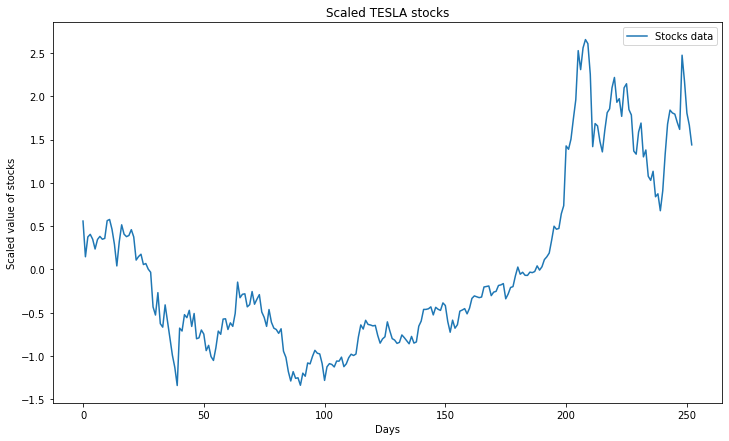

In [10]:
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='purple')
plt.title('Scaled TESLA stocks')
plt.xlabel('Days')
plt.ylabel('Scaled value of stocks')
plt.plot(scaled_dataset, label='Stocks data')
plt.legend()
plt.show()

In [11]:
def window_data(data, window_size):
  
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        
        i += 1
    assert len(X) ==  len(y)
    return X, y

In [12]:
X, y = window_data(scaled_dataset, 7)

**Creating and Training Datasets**

In [13]:
X_train  = np.array(X[:200])
y_train = np.array(y[:200])

X_test = np.array(X[200:])
y_test = np.array(y[200:])

print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (200, 7, 1)
y_train size: (200, 1)
X_test size: (46, 7, 1)
y_test size: (46, 1)


**Creating the LSTM Model (RNN Architecture)**




In [17]:

batch_size = 7 
window_size = 7
hidden_layer = 256 
clip_margin = 4 
learning_rate = 0.001 
epochs = 200 

In [18]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
inputs = tf.placeholder(tf.float32, [batch_size, window_size, 1])
targets = tf.placeholder(tf.float32, [batch_size, 1])

In [20]:

weights_input_gate = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev=0.05))
weights_input_hidden = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
bias_input = tf.Variable(tf.zeros([hidden_layer]))


weights_forget_gate = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev=0.05))
weights_forget_hidden = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
bias_forget = tf.Variable(tf.zeros([hidden_layer]))

weights_output_gate = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev=0.05))
weights_output_hidden = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
bias_output = tf.Variable(tf.zeros([hidden_layer]))


weights_memory_cell = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev=0.05))
weights_memory_cell_hidden = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
bias_memory_cell = tf.Variable(tf.zeros([hidden_layer]))

In [21]:

weights_output = tf.Variable(tf.truncated_normal([hidden_layer, 1], stddev=0.05))
bias_output_layer = tf.Variable(tf.zeros([1]))

In [22]:
def LSTM_cell(input, output, state):
    
    input_gate = tf.sigmoid(tf.matmul(input, weights_input_gate) + tf.matmul(output, weights_input_hidden) + bias_input)
    
    forget_gate = tf.sigmoid(tf.matmul(input, weights_forget_gate) + tf.matmul(output, weights_forget_hidden) + bias_forget)
    
    output_gate = tf.sigmoid(tf.matmul(input, weights_output_gate) + tf.matmul(output, weights_output_hidden) + bias_output)
    
    memory_cell = tf.tanh(tf.matmul(input, weights_memory_cell) + tf.matmul(output, weights_memory_cell_hidden) + bias_memory_cell)
    
    state = state * forget_gate + input_gate * memory_cell
    
    output = output_gate * tf.tanh(state)
    return state, output

In [24]:
outputs = []
for i in range(batch_size): 
    
    batch_state = np.zeros([1, hidden_layer], dtype=np.float32) 
    batch_output = np.zeros([1, hidden_layer], dtype=np.float32)
    
    for ii in range(window_size):
        batch_state, batch_output = LSTM_cell(tf.reshape(inputs[i][ii], (-1, 1)), batch_state, batch_output)
  
    outputs.append(tf.matmul(batch_output, weights_output) + bias_output_layer)

In [25]:
outputs

[<tf.Tensor 'add_511:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_575:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_639:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_703:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_767:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_831:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_895:0' shape=(1, 1) dtype=float32>]

Losses

In [26]:
losses = []

for i in range(len(outputs)):
    losses.append(tf.losses.mean_squared_error(tf.reshape(targets[i], (-1, 1)), outputs[i]))
    
loss = tf.reduce_mean(losses)

In [27]:
gradients = tf.gradients(loss, tf.trainable_variables())
clipped, _ = tf.clip_by_global_norm(gradients, clip_margin)
optimizer = tf.train.AdamOptimizer(learning_rate)
trained_optimizer = optimizer.apply_gradients(zip(gradients, tf.trainable_variables()))

In [28]:
session = tf.Session()

In [29]:
session.run(tf.global_variables_initializer())

In [30]:
for i in range(epochs):
    traind_scores = []
    ii = 0
    epoch_loss = []
    while(ii + batch_size) <= len(X_train):
        X_batch = X_train[ii:ii+batch_size]
        y_batch = y_train[ii:ii+batch_size]
        
        o, c, _ = session.run([outputs, loss, trained_optimizer], feed_dict={inputs:X_batch, targets:y_batch})
        
        epoch_loss.append(c)
        traind_scores.append(o)
        ii += batch_size
    if (i % 30) == 0:
        print('Epoch {}/{}'.format(i, epochs), ' Current loss: {}'.format(np.mean(epoch_loss)))

Epoch 0/200  Current loss: 0.17598986625671387
Epoch 30/200  Current loss: 0.024895446375012398
Epoch 60/200  Current loss: 0.01854400523006916
Epoch 90/200  Current loss: 0.016590304672718048
Epoch 120/200  Current loss: 0.016211632639169693
Epoch 150/200  Current loss: 0.01520558912307024
Epoch 180/200  Current loss: 0.015082462690770626


In [31]:
sup =[]
for i in range(len(traind_scores)):
    for j in range(len(traind_scores[i])):
        sup.append(traind_scores[i][j][0])


In [32]:
tests = []
i = 0
while i+batch_size <= len(X_test):
    
    o = session.run([outputs], feed_dict={inputs:X_test[i:i+batch_size]})
    i += batch_size
    tests.append(o)

In [33]:
tests_new = []
for i in range(len(tests)):
    for j in range(len(tests[i][0])):
        tests_new.append(tests[i][0][j])

In [34]:
len(tests_new)

42

In [35]:
test_results = []
for i in range(84):
    if i >= 42:
        test_results.append(tests_new[i-42])
    else:
        test_results.append(None)

In [36]:
test_results

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 array([[1.6833864]], dtype=float32),
 array([[1.7834129]], dtype=float32),
 array([[2.2401152]], dtype=float32),
 array([[2.2815132]], dtype=float32),
 array([[1.7765261]], dtype=float32),
 array([[0.9236165]], dtype=float32),
 array([[1.5310229]], dtype=float32),
 array([[2.420844]], dtype=float32),
 array([[1.65549]], dtype=float32),
 array([[0.7000714]], dtype=float32),
 array([[1.0034766]], dtype=float32),
 array([[1.9296813]], dtype=float32),
 array([[1.3284768]], dtype=float32),
 array([[1.3366854]], dtype=float32),
 array([[1.6527976]], dtype=float32),
 array([[1.5754251]], dtype=float32),
 array([[1.4507372]], dtype=float32),
 array([[1.6102451]], dtype=float32),
 array([[2.0438762]], dty

**Predictions from the network**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


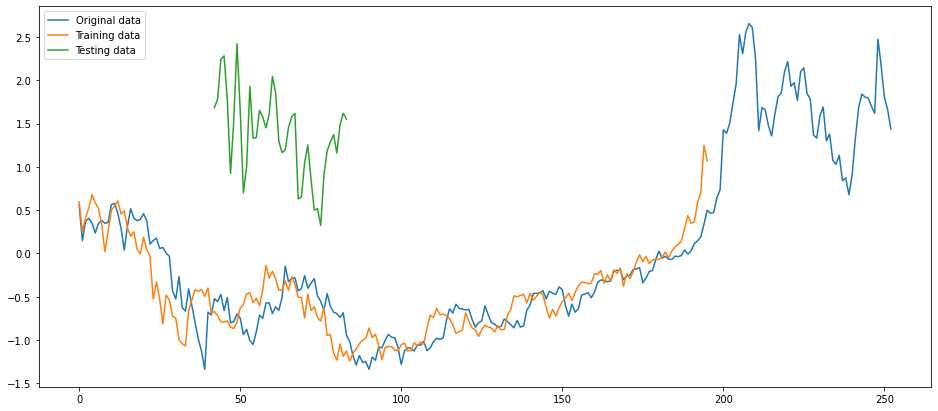

In [37]:
plt.figure(figsize=(16, 7))
plt.plot(scaled_dataset, label='Original data')
plt.plot(sup, label='Training data')
plt.plot(test_results, label='Testing data')
plt.legend()
plt.show()